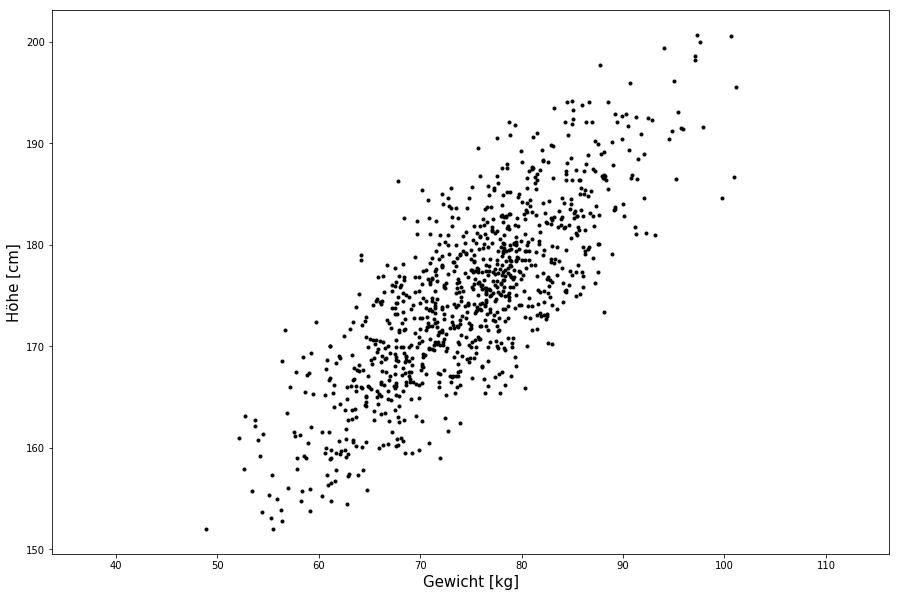

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = np.array([150, 200])
x = np.array([50, 100])
means = [x.mean(), y.mean()]  
stds = [x.std() / 3, y.std() / 3]
corr = 0.8
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

X = np.random.multivariate_normal(means, covs, 1000)
plt.figure(figsize = (15,10))
plt.ylabel('Höhe [cm]', fontsize = 15)
plt.xlabel('Gewicht [kg]', fontsize = 15)
plt.axis('equal')
plt.plot(X[:,0],X[:,1],'k.')

In [5]:
pd.DataFrame(X, columns = ['Gewicht', 'Höhe']).head()

,Gewicht,Höhe
0,90.086553,178.423590
1,75.690804,163.961403
2,63.553785,170.789770
3,66.561759,169.916140
4,67.254576,171.036315


In [11]:
from sklearn.decomposition import PCA

Y = X - X.mean(axis = 0)
pca = PCA()
pca.fit(Y)
transformed_data = pca.transform(Y)
pca_df = pd.DataFrame(transformed_data, columns=['PC1','PC2'])

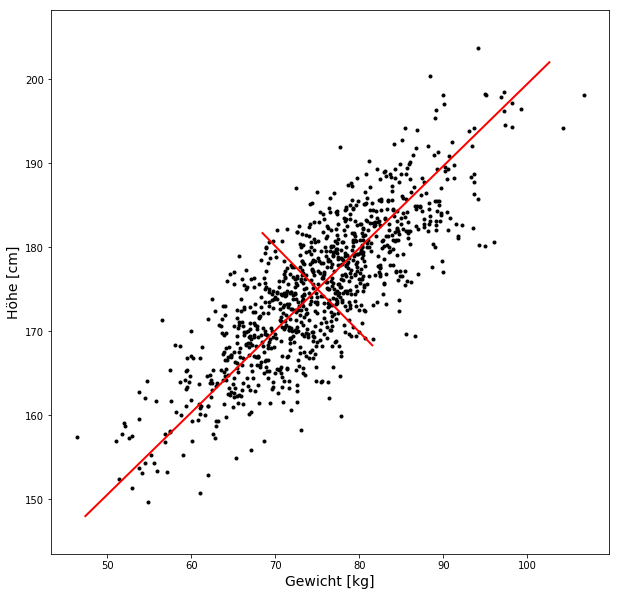

In [43]:
plt.figure(figsize = (10,10))
plt.ylabel('Höhe [cm]', fontsize = 14)
plt.xlabel('Gewicht [kg]', fontsize = 14)
plt.plot(Y[:,0] + means[0],Y[:,1] + means[1],'k.')
plt.axis('equal')
marker = 200
lambda_1 = pca.explained_variance_[0]/3.5
lambda_2 = pca.explained_variance_[1]/1.5
#plt.plot(Y[marker,0],Y[marker,1],'y.', markersize = 20)
plt.plot([-lambda_1*pca.components_[0,0] + means[0],lambda_1*pca.components_[0,0] + means[0]],[-lambda_1*pca.components_[0,1] + means[1],lambda_1*pca.components_[0,1] + means[1]],'r', linewidth = 2)
plt.plot([-lambda_2*pca.components_[1,0] + means[0],lambda_2*pca.components_[1,0] + means[0]],[-lambda_2*pca.components_[1,1] + means[1],lambda_2*pca.components_[1,1] + means[1]],'r', linewidth = 2)

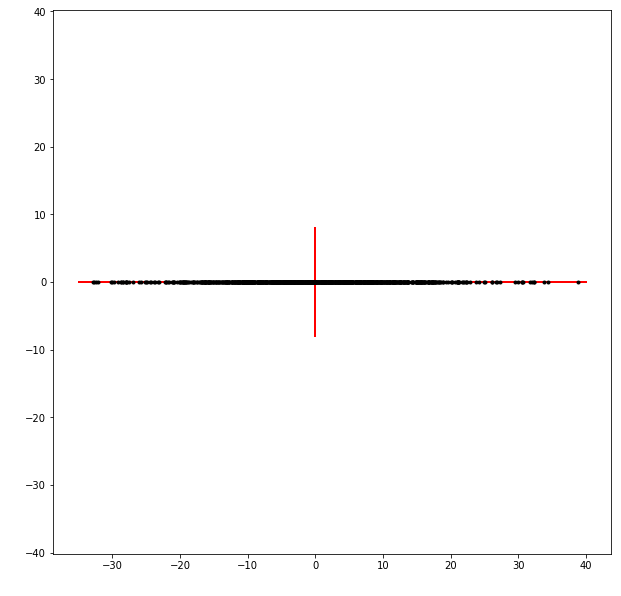

In [44]:
w_1 = Y.dot(pca.components_[0])
w_2 = Y.dot(pca.components_[1])
plt.figure(figsize = (10,10))
plt.plot([-35,40],[0,0],'r', linewidth = 2)
plt.plot([0,0],[-8,8],'r', linewidth = 2)
plt.axis('equal')
plt.ylabel(' ', fontsize = 14)
plt.xlabel(' ', fontsize = 14)
plt.plot(w_1,np.zeros(1000),'k.')
#plt.plot(w_1[marker],0,'y.', markersize = 20)

In [152]:
V = pca.components_
proj_operator = np.array([[V[0,0]**2, V[0,0]*V[0,1]],
                 [V[0,1]*V[0,0], V[0,1]**2]])
proj_data = proj_operator.dot(Y.T).T
proj_df = pd.DataFrame(proj_data, columns = ['PROJ_1', 'PROJ_2'])

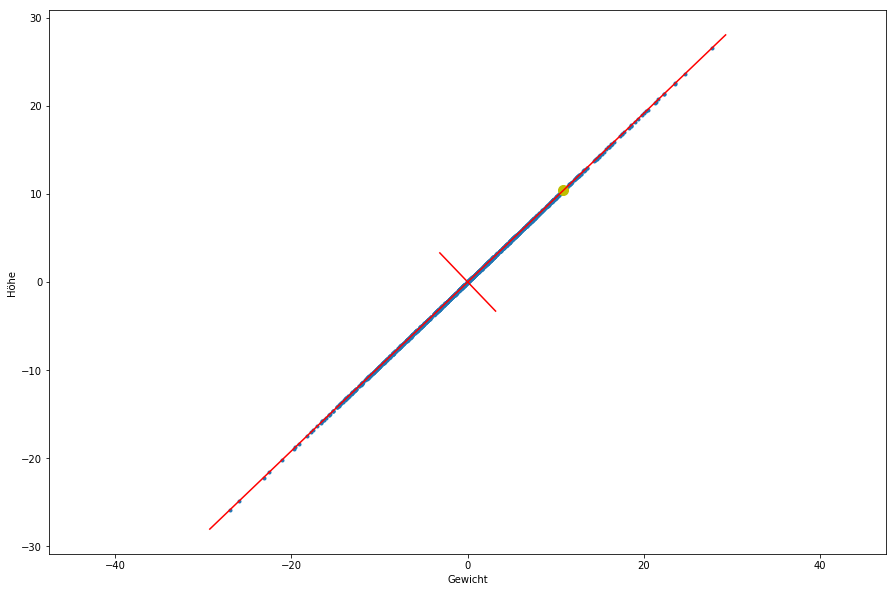

In [156]:

plt.figure(figsize = (15,10))
plt.ylabel('Höhe')
plt.xlabel('Gewicht')
plt.plot(proj_df['PROJ_1'],proj_df['PROJ_2'],'.')
plt.axis('equal')
marker = 200
plt.plot(proj_df.loc[marker,'PROJ_1'],proj_df.loc[marker,'PROJ_2'],'y.', markersize = 20)
plt.plot([-lambda_1*pca.components_[0,0],lambda_1*pca.components_[0,0]],[-lambda_1*pca.components_[0,1],lambda_1*pca.components_[0,1]],'r')
plt.plot([-lambda_2*pca.components_[1,0],lambda_2*pca.components_[1,0]],[-lambda_2*pca.components_[1,1],lambda_2*pca.components_[1,1]],'r')